# Linear Regression

In [1]:
# Filter Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Lets import CSV file

day = pd.read_csv(r'C:\Users\joshu\Desktop\upGrad _ Assignment\Linear Regression _ Assignment\Source Files\day.csv')

### 1. Lets inspect the imported file

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day.shape

(730, 16)

In [6]:
# There are no null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# only date is not in numeric value, which is ok

day.describe().shape

(8, 15)

In [9]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### 2. Lets clean the data

In [11]:
# lets drop some columns which are not useful for building the model

# Date column ("dteday") can be dropped, before droping lets create a new column to know the age of the borrowing
day['age'] = (pd.to_datetime(day['dteday'], format = '%d-%m-%Y') - pd.to_datetime('01-01-2018', format = '%d-%m-%Y')).dt.days

In [12]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,age
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [13]:
# Lets drop the columns

day.drop(['dteday'], axis = 1, inplace = True)
day.drop(['instant'], axis = 1, inplace = True)
day.drop(['casual', 'registered'], axis = 1, inplace = True)

In [14]:
day.shape

(730, 13)

In [15]:
day.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


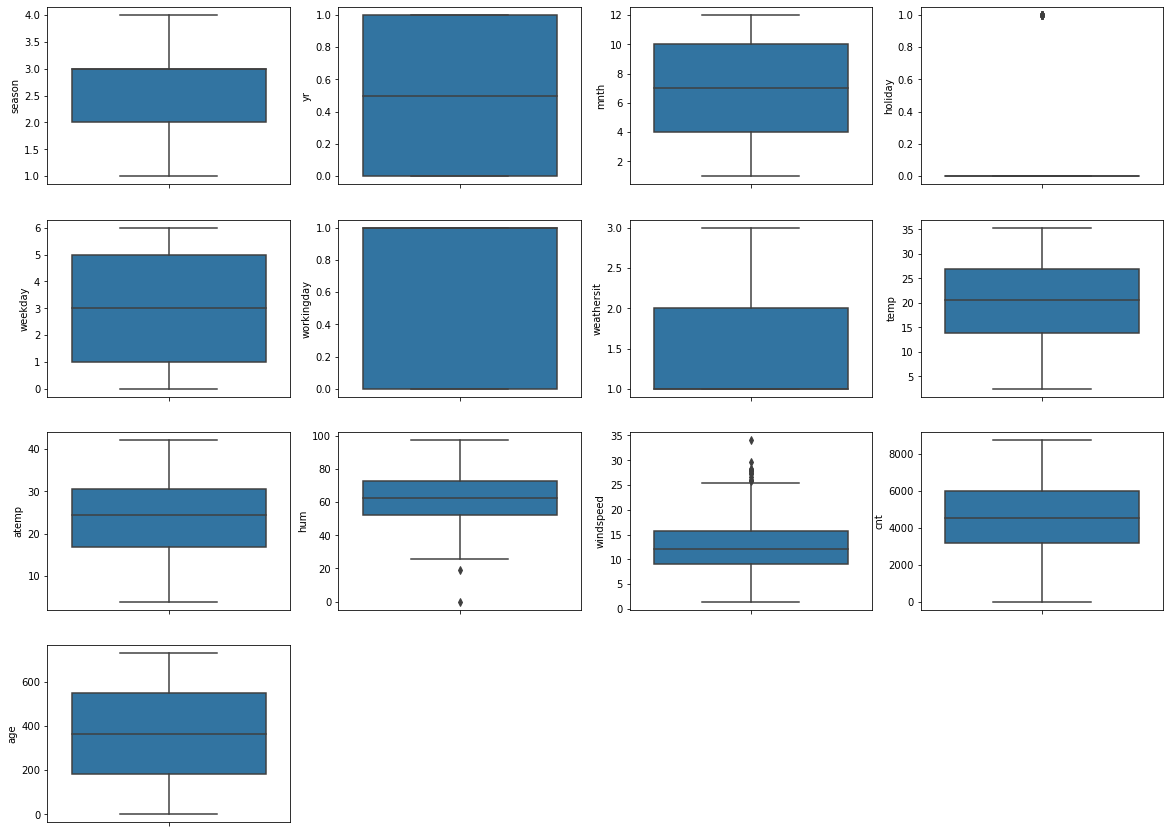

In [16]:
# Lets check for outliers

plt.figure(figsize = (20,15))
cols = day.columns

count = len(cols)
x = 1
for col in cols :
    plt.subplot(4, 4, x)
    sns.boxplot(y = col, data = day)
    x += 1
    
# No outliers found

In [17]:
# Lets Convert necessary columns to Categorical columns

day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'age'],
      dtype='object')

In [18]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [19]:
day.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace = True)

In [20]:
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [21]:
day.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace = True)

In [22]:
day.weathersit.value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [23]:
day.mnth.replace({1:'jan', 2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul', 8:'aug',9:'sept', 10:'oct', 11:'nov',12:'dec'}, inplace = True)

In [24]:
day.mnth.value_counts()

jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64

In [25]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,spring,0,jan,0,1,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,2,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,3,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,4,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,5,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### 3. Lets Check Relationships

<Figure size 1080x2160 with 0 Axes>

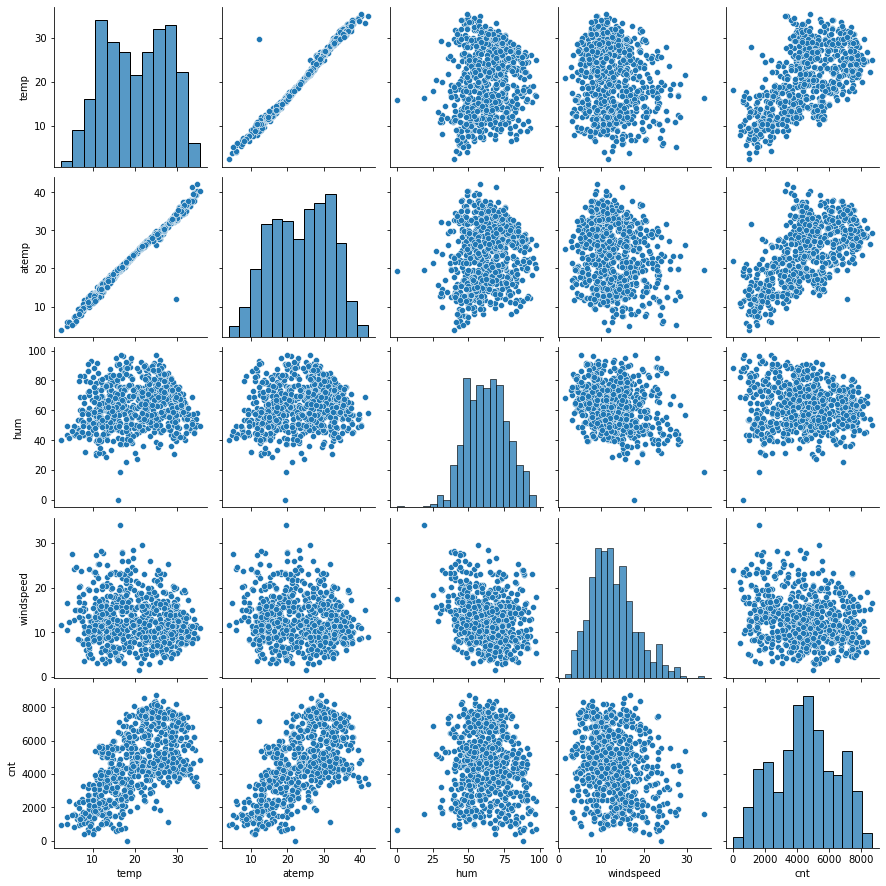

In [26]:
# Relations between categorical data

plt.figure(figsize = (15,30))
sns.pairplot(data = day, vars = ["temp", 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

# We can clearly see that there is a strong corelation between temp and atemp column

<Figure size 1440x1080 with 0 Axes>

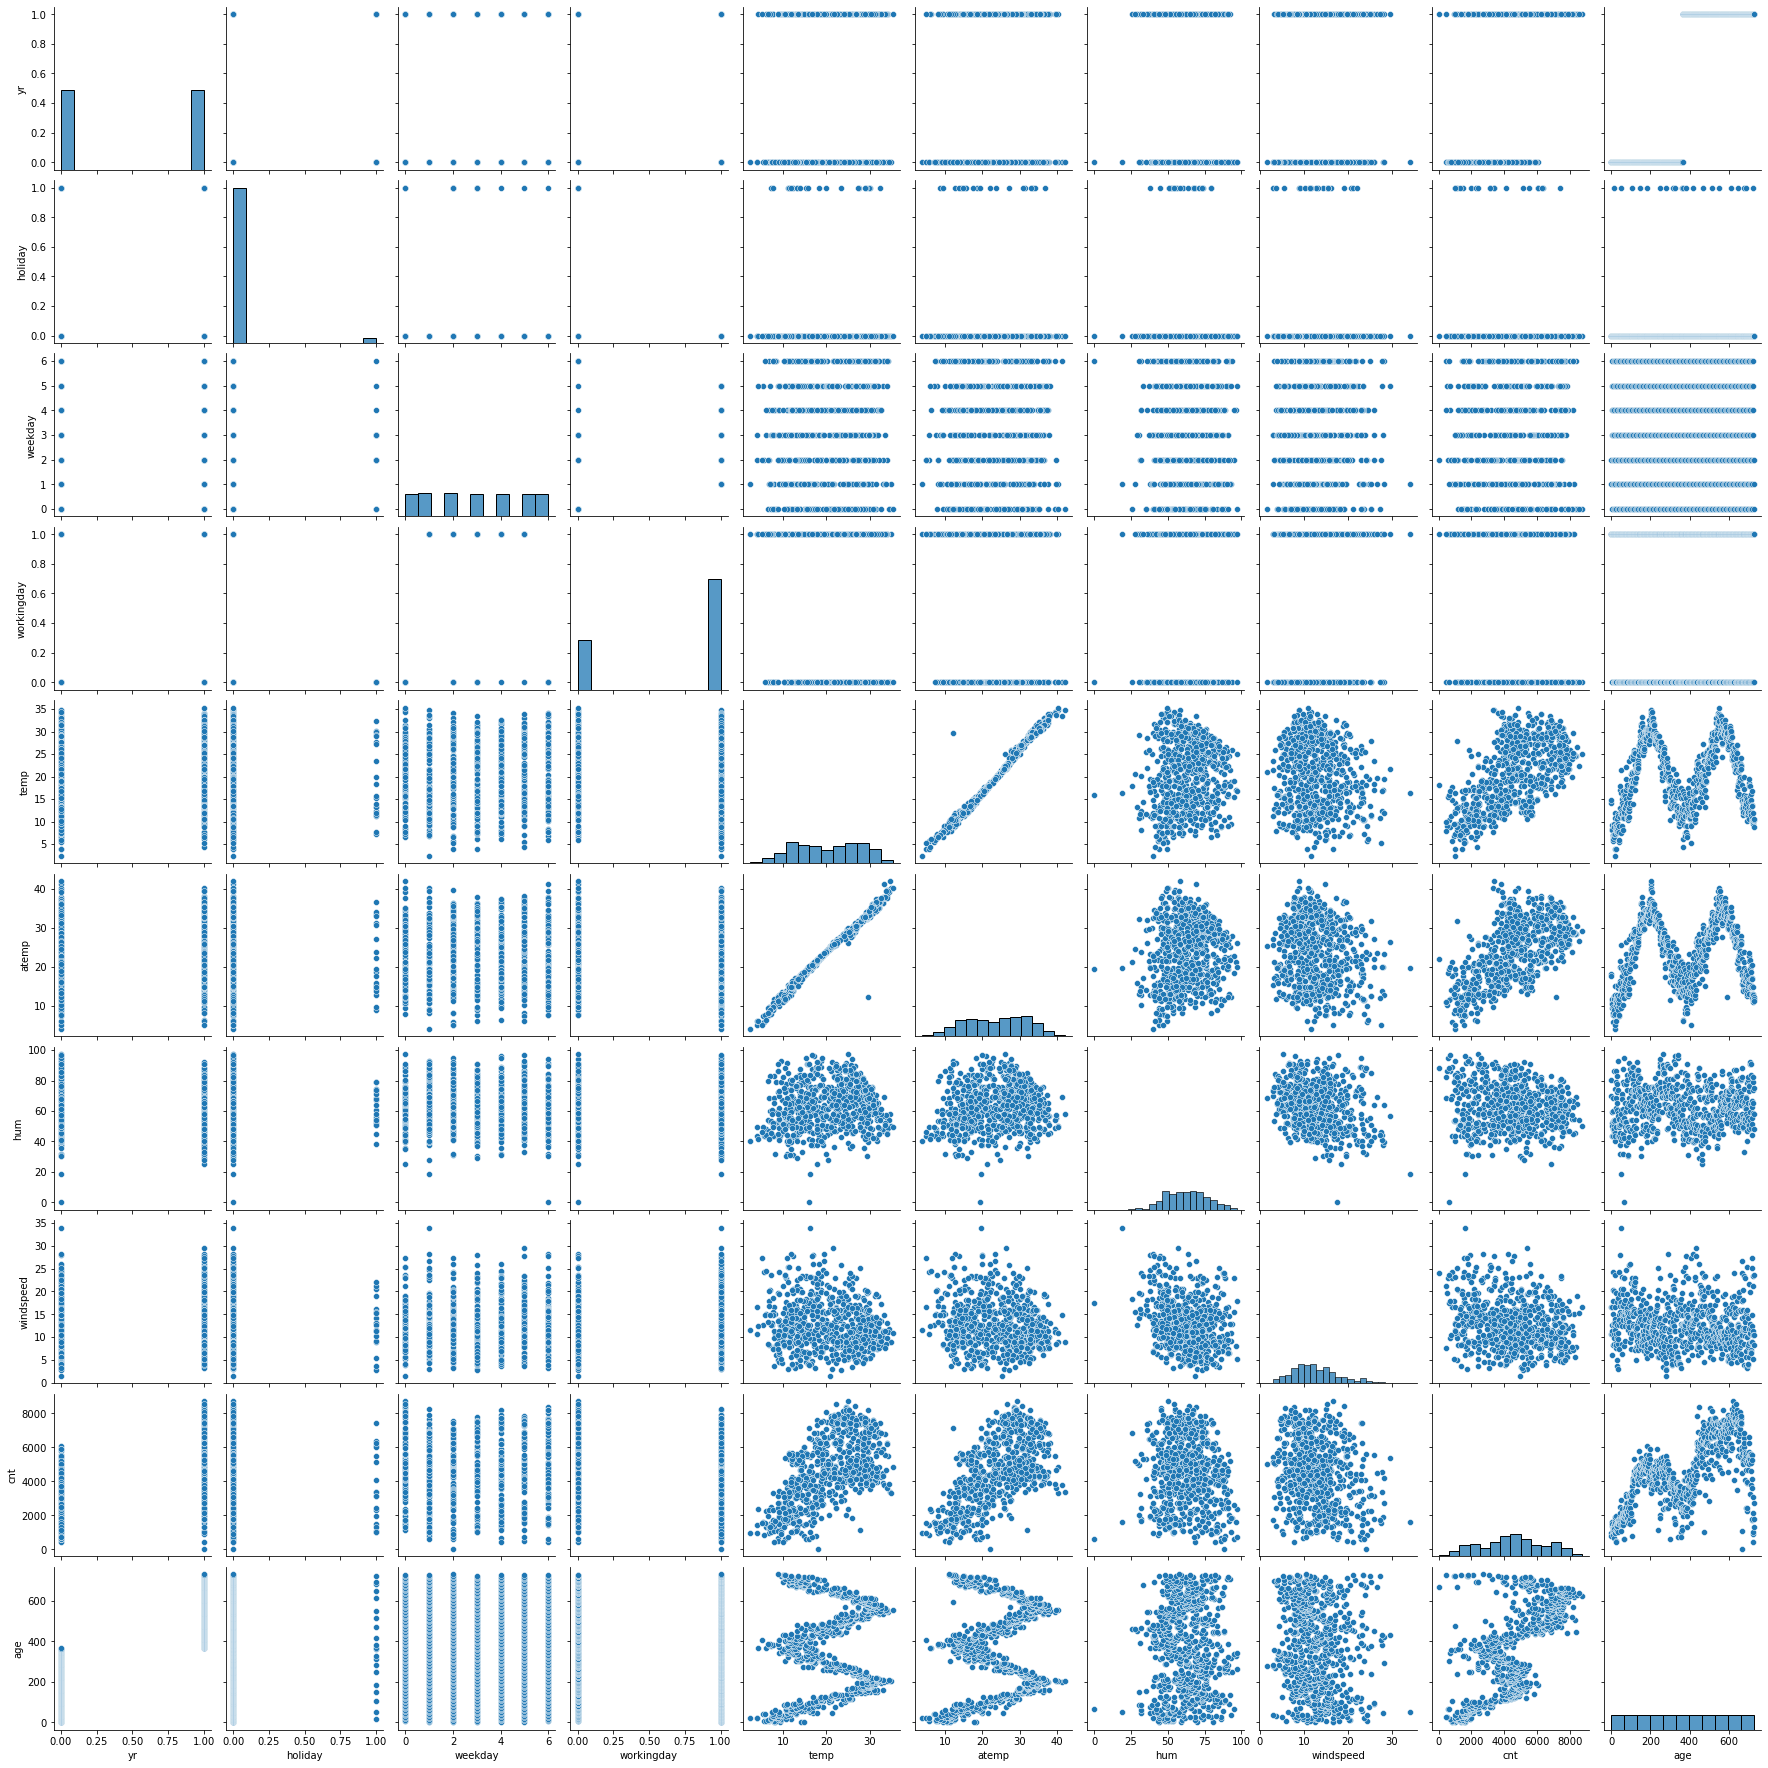

In [27]:
# Relation between Numerical values

plt.figure(figsize = (20,15))
sns.pairplot(day)
plt.show()

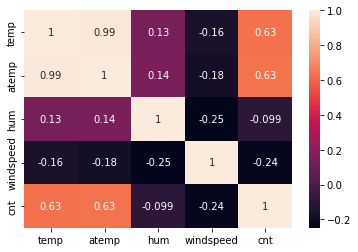

In [28]:
# Relation between continuous variables

sns.heatmap(day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True)
plt.show()

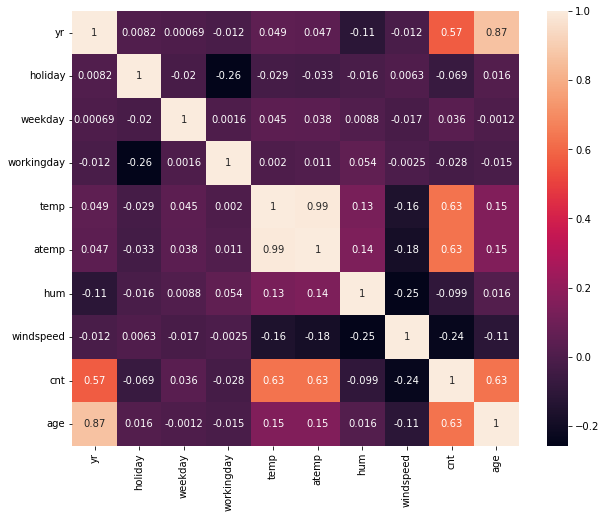

In [29]:
# Corelations between numeric values

plt.figure(figsize = (10,8))
sns.heatmap(day.corr(), annot = True)
plt.show()

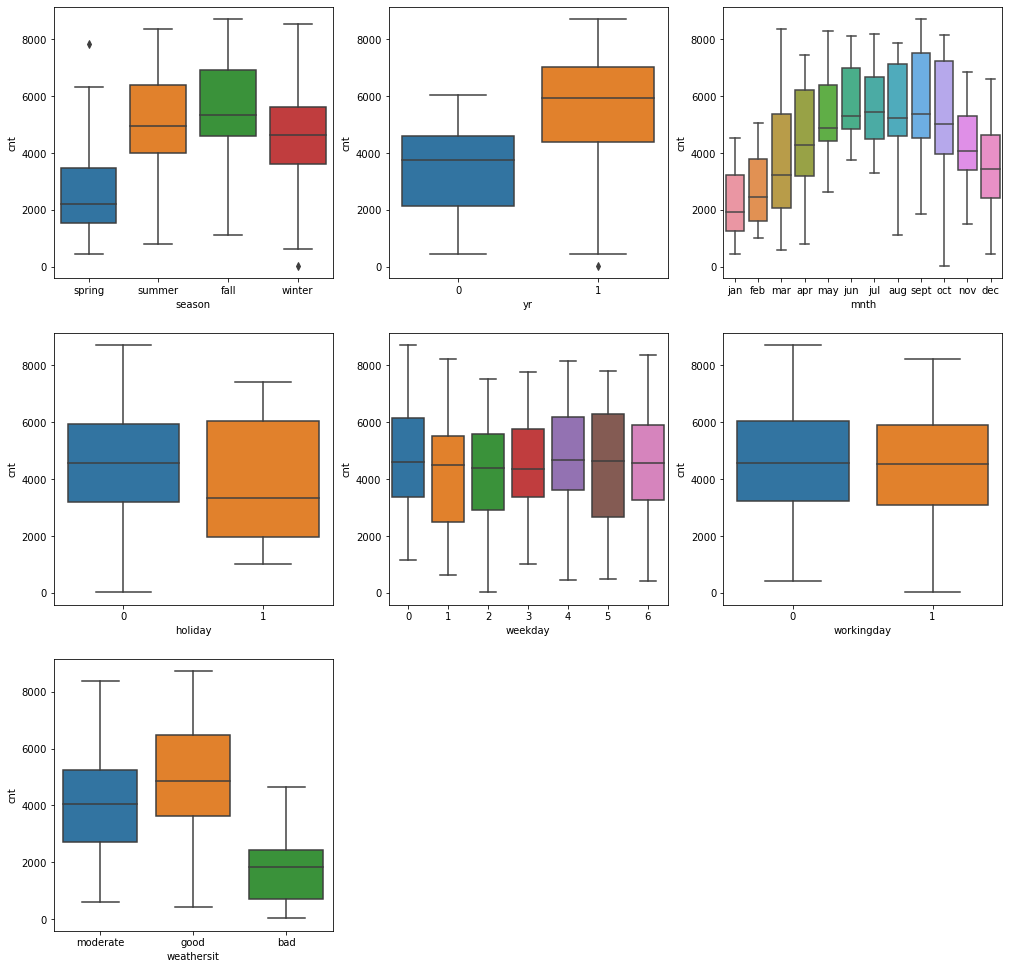

In [30]:
# Categorical variables relation with Target variable

rel_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize = (17,17))
for i in enumerate(rel_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data = day, x = i[1], y = 'cnt')
plt.show()

### Insights

1. Fall Season has highest demand, but not much difference between winter, summer, fall

2. 2019 has more demand than 2018

3. We have good demand curve till june

4. High demand on clear sky

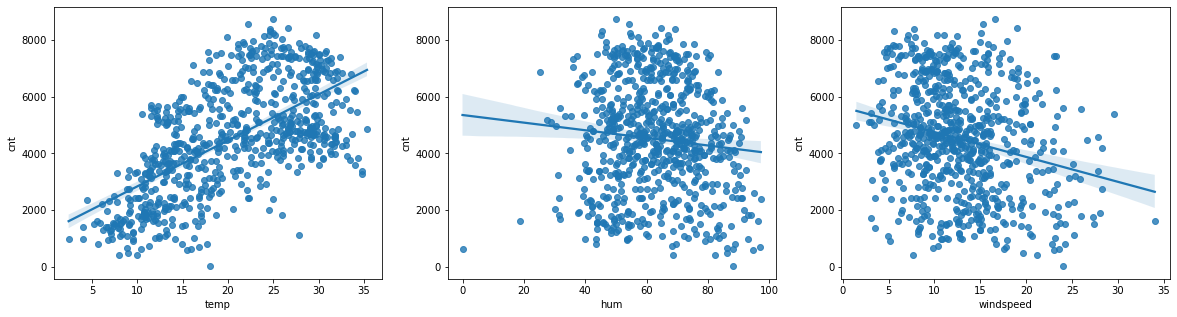

In [31]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.regplot(data = day, y = 'cnt', x = 'temp')
plt.subplot(1,3,2)
sns.regplot(data = day, y = 'cnt', x = 'hum')
plt.subplot(1,3,3)
sns.regplot(data = day, y = 'cnt', x = 'windspeed')
plt.show()

### Insights
1. cnt and temp positively correlated
2. hum and windspeed are scattered around

### 4. Lets Prepare the data for Linear Regression

In [32]:
# Lets creat dummy variables for the Categorical Variables

day = pd.get_dummies(data = day, columns = ['season', 'mnth', 'weekday'], drop_first = True)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,2,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,3,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,4,...,0,0,0,0,0,0,0,0,1,0


In [33]:
day = pd.get_dummies(data = day, columns = ['weathersit'])
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age,season_spring,...,mnth_sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,1,0,0,1,0


In [34]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'age', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### 5. Lets build the model

In [35]:
# Lets check the shape

day.shape

(730, 32)

In [36]:
# lets Split the data for Train and Test (70,30)
x = day
y = day.pop('cnt')

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state = 100)



In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 31)
(220, 31)
(510,)
(220,)


In [38]:
# Lets scale continuous variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'age']
scaler = MinMaxScaler()
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,age,season_spring,season_summer,...,mnth_sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.152473,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Model using RFE approach

In [39]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
rfe = RFE(lr,15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [41]:
# Automatically selected columns after 15 steps

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('age', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 16),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 13),
 ('mnth_jun', False, 5),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 17),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 9),
 ('weekday_4', False, 7),
 ('weekday_5', False, 8),
 ('weekday_6', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

#### Model using Statsmodel api

In [42]:
# Defined fuction to build the model
def stat_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

In [43]:
# Defined function to calculate VIFs
def cal_vif(cols):
    df = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF', ascending = False))

In [44]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_spring',
       'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

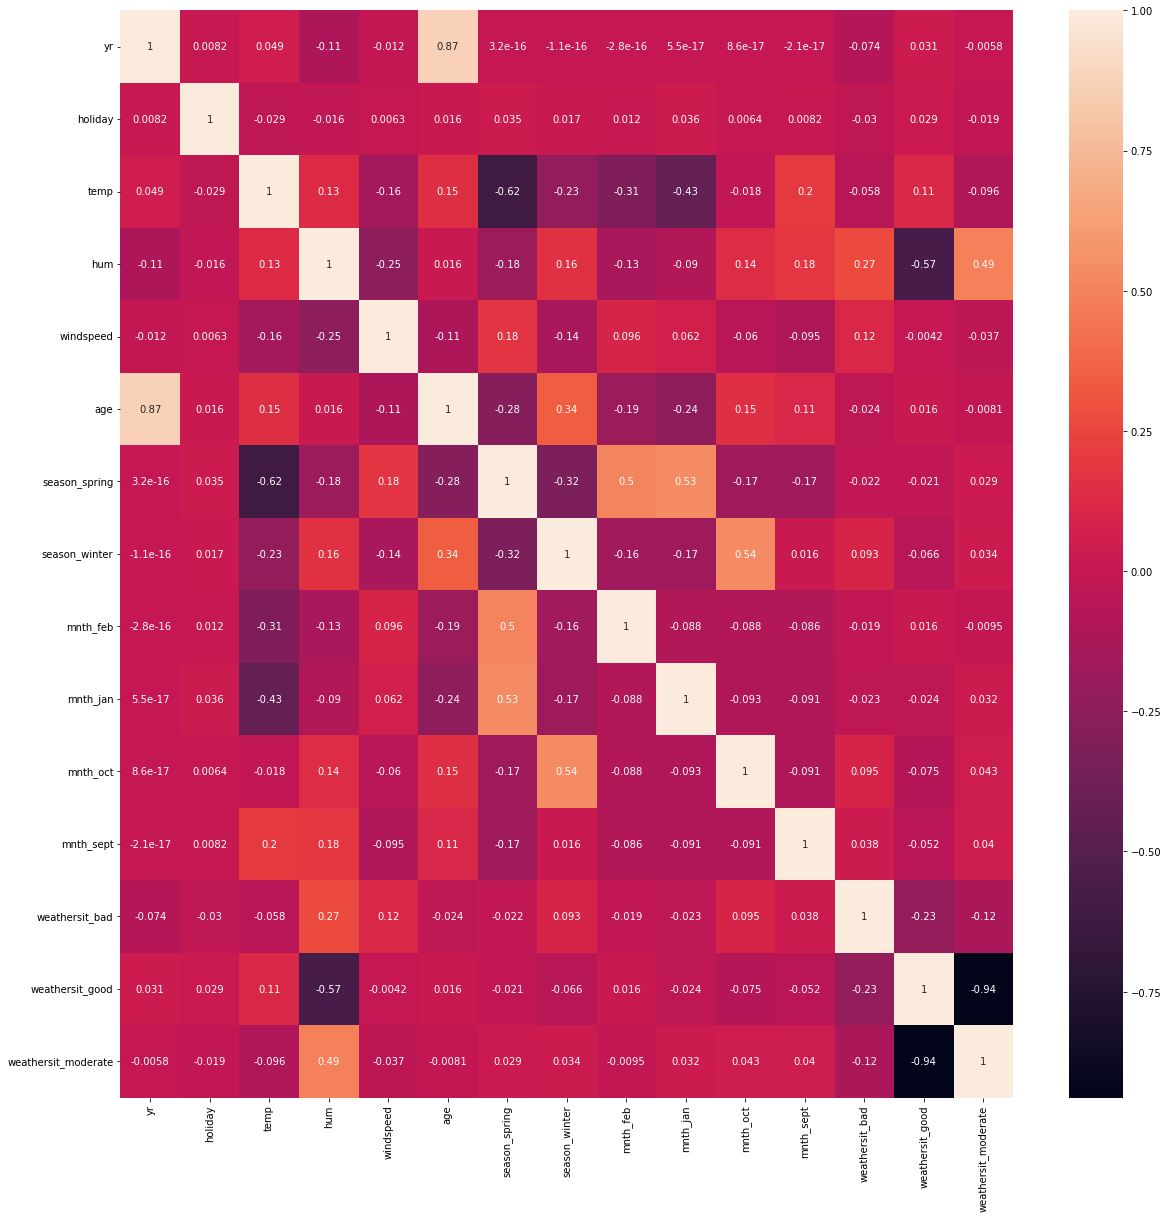

In [45]:
# Lets check the correlation of variables selected by above process

plt.figure(figsize = (20,20))
sns.heatmap(day[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_spring',
       'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate']].corr(), annot = True)
plt.show()

#### Lets start with above selected variables

In [46]:
# Model 1
sel_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'age', 'season_summer','season_winter', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop age column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.46e-189
Time:                        21:27:56   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1217.5835    

In [47]:
# Model 2
sel_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop mnth_feb column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.15e-189
Time:                        21:27:56   Log-Likelihood:                -4115.1
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1087.9398    

In [48]:
# Model 3
sel_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_aug', 'mnth_jan', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop mnth_jan column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.44e-190
Time:                        21:27:56   Log-Likelihood:                -4115.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     497   BIC:                             8313.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1014.8955    

In [49]:
# Model 4
sel_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_aug', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop mnth_aug column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.50e-191
Time:                        21:27:56   Log-Likelihood:                -4117.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     498   BIC:                             8311.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 907.2010    

In [50]:
# Model 5
sel_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_good', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop weathersit_good column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.32e-189
Time:                        21:27:57   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     499   BIC:                             8316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 869.9441    

In [51]:
# Model 6
sel_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop hum column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.32e-189
Time:                        21:27:57   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     499   BIC:                             8316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1987.5356    

In [52]:
# Model 7
sel_vars = ['yr', 'holiday', 'temp', 'windspeed', 'season_summer','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
stat_model(sel_vars)
cal_vif(sel_vars)

#Lets drop weathersit_good column as it has negative coefficient and insignificant as it has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.83e-186
Time:                        21:27:57   Log-Likelihood:                -4134.5
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     500   BIC:                             8331.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1116.5474    

#### Let the above Model 7 be the final model as it has p-value as 0.00 and R2 as 0.827 also a decent multi coliinear variables

In [53]:
# Lets define a function to build a model

def build_model(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [54]:
# Final model using SKlearn
vars = ['yr', 'holiday', 'temp', 'windspeed', 'season_summer','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
lr = build_model(x_train[vars], y_train)
print(lr.intercept_, lr.coef_)

1116.5474300381384 [ 2024.02548967  -857.77337272  4763.28200574 -1332.01581622
   765.59452863  1124.26762284   879.58654789 -2458.70043814
  -681.23142922]


### 6. Evaluating Final Model

In [55]:
# Residual Analysis
y_train_pred = lr.predict(x_train[vars])

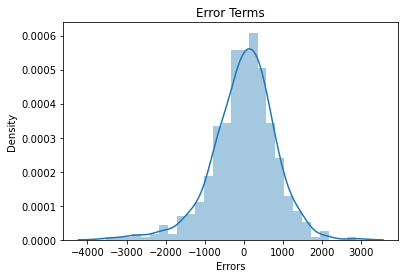

In [56]:
# Lets check the Error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

# Errors are normally distributed

In [57]:
# Lets check R square
r2_score(y_train, y_train_pred)

# R Square values matches with our final Model 7

0.8303450237489228

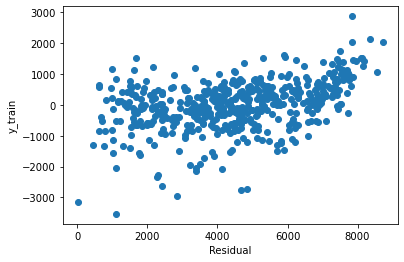

In [58]:
# Linearity Check

plt.scatter(y_train, (y_train - y_train_pred))
plt.xlabel('Residual')
plt.ylabel('y_train')
plt.show()

In [59]:
# lets predict values for the test datas

num_vars = ['temp','atemp', 'hum', 'windspeed', 'age']
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [60]:
fin_cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_summer','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
y_test_pred = lr.predict(x_test[fin_cols])

In [61]:
# R Squared value for test predictions
r2_score(y_test, y_test_pred)

0.7941977535477245

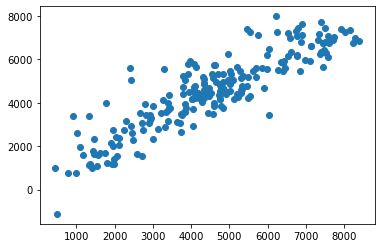

In [63]:
# Test
plt.scatter(y_test, y_test_pred)
plt.show()

In [ ]:
# Lets interpret the RFE with Manual Model result
fin_cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_summer','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate']
lm = stat_model(fin_cols)

## Insights:

1. Company should focus on expandind business during Spring season
2. September month suits the best